## 文本处理

### 计算给定文本文档集合的 TF-IDF 权重，并找出每个词的最大权重

**weight = tfidf.fit_transform(x).toarray()**

- tfidf.fit_transform(x):

    fit(x)：学习（拟合）输入文档集合 x 中的词汇表（即确定所有不重复的词）。

    transform(x)：基于学习到的词汇表，将文档集合 x 转换成一个 TF-IDF 矩阵（稀疏矩阵格式）。

- toarray(): 将得到的稀疏矩阵转换为一个标准的 NumPy 数组（稠密矩阵），并赋值给变量 weight。

    这个矩阵的形状是 (文档数, 词汇数)。

**word = tfidf.get_feature_names_out() # 得到不重复的关键词**
- 调用 tfidf.get_feature_names_out()：获取在 fit 步骤中学到的所有不重复的关键词（特征名称）列表。

- 这个列表的顺序与 weight 矩阵中的列顺序是一致的。

**maxweight = np.max(weight, axis=0)**
- np.max(weight, axis=0): 对 TF-IDF 矩阵 weight 按列（axis=0） 计算最大值。

- 由于矩阵的列代表不同的词，因此这个操作是找出每个词在所有文档中获得的最大 TF-IDF 权重。

- 结果是一个一维数组，赋值给 maxweight。

**word_fre = {word[j]: maxweight[j] for j in range(len(word))}**
- 使用字典推导式 (Dictionary Comprehension) 将词汇 (word) 和其对应的最大权重 (maxweight) 组合成一个字典 word_fre。

    键（Key）：词汇（word[j]）。

    值（Value）：该词汇的最大 TF-IDF 权重（maxweight[j]）。

**sorted_word_fre = sorted(word_fre.items(), key=lambda kv: (-kv[1], kv[0]))**
- sorted(word_fre.items(), ...): 对字典 word_fre 的键值对进行排序。

- key=lambda kv: (-kv[1], kv[0]): 定义排序规则：

    -kv[1]：kv[1] 是权重值。加上负号后，sorted 函数会按降序排列权重。

    kv[0]：如果权重相同，则按词汇（kv[0]）的字母顺序升序排列。

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer # 用于将文本文档集合转换为 TF-IDF 特征矩阵
import numpy as np

def CalculateTFIDF(x): # x 必须是字符串

    tfidf = TfidfVectorizer() # 计算 x 的 TF-IDF 矩阵: 创建一个 TfidfVectorizer 对象实例
    weight = tfidf.fit_transform(x).toarray() # 训练拟合转化为numpy
    word = tfidf.get_feature_names_out() # 得到不重复的关键词

    print(word) 
    
    # weight文档数目: 打印出词汇表的大小 (len(word)) 和文档的数量 (len(weight)，即 TF-IDF 矩阵的行数)
    print('大小是', len(word), ' ', len(weight))

    # 计算每个词的最大 TF-IDF 权重
    maxweight = np.max(weight,axis = 0)# 这是一个一维数组: axis = 0 按列计算

    # 构建词汇和最大权重的字典
    word_fre = {word[j] : maxweight[j] for j in range(len(word))}

    # 按权重排序 (降序)
    sorted_word_fre = sorted(word_fre.items(), key = lambda kv:(-kv[1], kv[0]))

    print(sorted_word_fre)
    return word_fre

### 中文文本数据预处理
包括读取停用词、提取汉字、分词和去除停用词，最后将处理后的文本返回供后续分析使用（例如计算 TF-IDF）。

**import re**
- 导入 re 库（正则表达式模块），用于进行文本模式匹配（在这里是提取汉字）。

**stopwords = [line.strip() for line in open('cn_stopwords.txt',encoding='UTF-8').readlines()]**
- 打开名为 'cn_stopwords.txt' 的文件，指定编码为 UTF-8。

- .readlines() 读取文件的所有行，返回一个列表。

- [line.strip() for line in ...]：这是一个列表推导式，对每一行：line.strip()：移除行首尾的空白字符（包括换行符）。最终创建一个包含所有停用词的列表 stopwords。

**chinese_text = re.findall(chinese_pattern, text)**
- re.findall(chinese_pattern, text)：在输入文本 text 中查找所有符合 chinese_pattern 模式的子串，并返回一个列表 chinese_text

**lineStr = ' '.join(line_without)**
- 使用空格 ' ' 作为分隔符，将去除了停用词的词语列表 line_without 重新连接成一个单一的字符串 lineStr。这是为了适应像 TfidfVectorizer 这样接受字符串作为输入的模型。
- line_without = ['数据', '处理', '中文', '文本', '非常', '重要']
- lineStr = ' '.join(line_without)
- lineStr = "数据 处理 中文 文本 非常 重要"

In [8]:
import pandas as pd
import re
import jieba

# 停用词列表函数
def GetStopWordsList():
    stopwords = [line.strip() for line in open('cn_stopwords.txt',encoding = 'UTF-8').readlines()]
    return stopwords

# 匹配汉字函数
def MatchChinese(text):
    # 匹配所有汉字字符
    chinese_pattern = r'[\u4e00-\u9fa5]+' # \u4e00-\u9fa5 用于表示Unicode中常见汉字的范围
    # 查找所有汉字
    chinese_text = re.findall(chinese_pattern,text)
    # re.findall(chinese_pattern, text)：在输入文本 text 中查找所有符合 chinese_pattern 模式的子串，并返回一个列表 chinese_text
    return chinese_text

# 文本处理函数 (列表转字符串) : list->string
def ProcessWords(sentence):
    sentence_list = MatchChinese(sentence)
    sentence = '' # 初始化一个空字符串 sentence，用于存放连接后的结果
    for sentence_l in sentence_list:
        sentence += sentence_l
    return sentence

# 对句子进行中文分词
def SegDepart(sentence):
    # 对文档中的每一行进行中文分词
    sentence_depart = jieba.lcut(str(sentence).strip())
    return sentence_depart

# 去除停用词
def RemoveStopWords(sentence_list,stopwords_list):
    out_list = [word for word in sentence_list if word not in stopwords_list]
    return out_list


# 主数据处理流程函数
def ProcessData(filepath):
    '''
    :param filepath:
    :return:
    '''
    data = pd.read_excel(filepath)

    text = []
    stop_list = GetStopWordsList()
    for i in range(len(data)):
        str_row = data.iloc[i,3] # 评论行
        # 移除不合适的字符,只留下中文字符串
        str_row = ProcessWords(str_row)
        # 分词
        str_row = SegDepart(str_row)
        # 移除停用词
        line_without = RemoveStopWords(str_row,stop_list)
        # 移除特定的停用词
        #stop_listBaidu = getStopwordsWeiboList()
        #line_without = moveStopwords(line_without, stop_listBaidu)
        line_str = ' '.join(line_without)
        text.append(line_str)

    return text

In [9]:
x = ProcessData('weibo_data.xlsx')
word_fre = CalculateTFIDF(x)

['一半' '一度' '一心' ... '黑鹰' '鼓挂' '龙蟠']
大小是 1081   106
[('大过年', np.float64(1.0)), ('想到', np.float64(1.0)), ('暖冬', np.float64(1.0)), ('玉渊潭', np.float64(1.0)), ('玉渊潭公园', np.float64(1.0)), ('美的', np.float64(1.0)), ('寻梅', np.float64(0.9513710607332649)), ('归来', np.float64(0.9513710607332649)), ('傍晚', np.float64(0.9431224959834253)), ('准备', np.float64(0.9431224959834253)), ('路过', np.float64(0.9359744034133658)), ('日出', np.float64(0.8969980516409491)), ('味十足', np.float64(0.8812007686805863)), ('樱花', np.float64(0.8652253640164539)), ('年初', np.float64(0.8560099196025523)), ('蜡梅', np.float64(0.8452182743261847)), ('大寒', np.float64(0.7749884497852049)), ('飘香', np.float64(0.7642105570244988)), ('鸳鸯', np.float64(0.725967471600548)), ('回去', np.float64(0.7071067811865476)), ('安息', np.float64(0.7071067811865476)), ('开工', np.float64(0.7071067811865476)), ('逝者', np.float64(0.7071067811865476)), ('同事', np.float64(0.6892714057397763)), ('太远', np.float64(0.6892714057397763)), ('害得', np.float64(0.6892714057397

## 词云

### 基于词频数据生成中文词云图

**wc.generate_from_frequencies(wordsDict)**
- 调用 WordCloud 对象的 generate_from_frequencies 方法，使用传入的词频字典 wordsDict 来生成词云布局。词语的大小由其在字典中的值（频率/权重）决定。

**wc.to_file(f'{name}词云.jpg')**
- 调用 WordCloud 对象的 to_file 方法，将生成的词云图保存为 JPEG 文件。

**plt.imshow(wc)**
- 在 Matplotlib 的当前图形窗口中显示生成的词云对象 wc。

**plt.axis("off")**
- 关闭图形的坐标轴显示（因为词云图不需要刻度、标签或边框）。

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager

def DrawWordCloud(wordsDict,name):
    """
    生成词云。
    1.配置WordCloud。2.plt进行显示
    :return:
    """

    # 设置字体
    font_path = 'SIMHEI.TTF'

    # 设置词云属性
    wc = WordCloud(font_path = font_path,           # 设置字体,若是有中文的话，这句代码必须添加，不然会出现方框，不出现汉字
                   background_color = 'white',      # 背景颜色
                   max_words = 100,                 # 词云显示的最大词数
                   random_state = 30,               # 设置有多少种随机生成状态，即有多少种配色方案
                   width = 800,                     # 输出的画布宽度
                   height = 600)                    # 输出的画布高度

    # 根据频率生成词云
    wc.generate_from_frequencies(wordsDict)

    # 显示图片
    plt.figure()
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
    
    # 保存到本地
    wc.to_file(f'{name}词云.jpg')

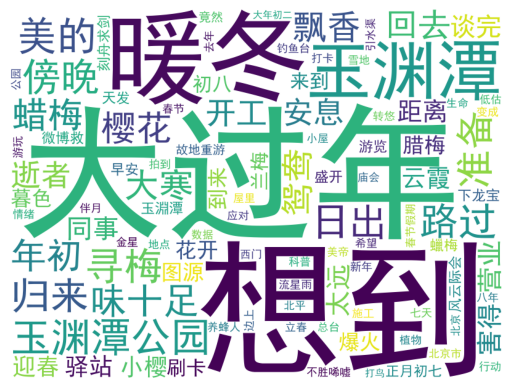

In [13]:
DrawWordCloud(word_fre,'weibo_玉渊潭')

### 基于词频数据生成中文词云图[带蒙版]

**设置背景图片**

from PIL import Image

mask_image = np.array(Image.open("flower_icon.png"))

黑白图片：

白色（255,255,255）部分 → 背景

黑色（0,0,0）部分 → 填充

灰度图片 也可以，WordCloud 会自动二值化。

推荐 PNG 格式：

如果是 JPEG，确保背景纯黑色

PNG 透明背景可行，但 np.array() 读取后会有 4 个通道（RGBA），需要转换成单通道：

mask_image = np.array(Image.open("background.png").convert("L"))  # 转灰度

In [16]:
from PIL import Image
def drawWordCloudwithMask(wordsDict,name):
    """
    生成词云。
    1.配置WordCloud。2.plt进行显示
    :return:
    """
    
    # 设置字体
    font_path = 'SIMHEI.TTF'
    
    # 设置背景图片
    mask_image = np.array(Image.open("flower_icon.jpg")) 
    
    # 设置词云属性
    wc = WordCloud(font_path=font_path,           # 设置字体,若是有中文的话，这句代码必须添加，不然会出现方框，不出现汉字
                   background_color="white",      # 背景颜色
                   max_words= 100,                # 词云显示的最大词数
                   mask= mask_image,              # 设置背景图片 # 黑色表示形状，白色作为背景
                   random_state=30,               # 设置有多少种随机生成状态，即有多少种配色方案
                   width= 800,                    # 输出的画布宽度
                   height= 600,                   # 输出的画布高度
                   )
    # 根据频率生成词云
    wc.generate_from_frequencies(wordsDict)
    
    # 显示图片
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    # 保存到本地
    
    wc.to_file(f'{name}词云.jpg')

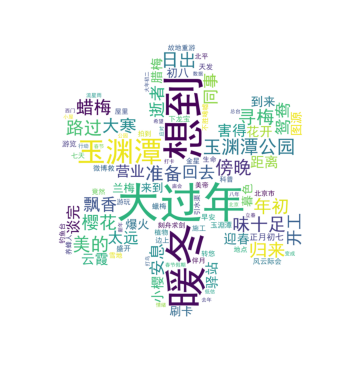

In [17]:
drawWordCloudwithMask(word_fre,'weibo_玉渊潭')

### 基于词频数据生成中文词云图[带蒙版+色彩配置]

**colormap**
upported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_grey_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gist_yerg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'grey_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'vanimo', 'vanimo_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager
from PIL import Image

def DrawWordCloudWithColor(wordsDict,name):
    """
    生成词云。
    1.配置WordCloud。2.plt进行显示
    :return:
    """
    # 设置字体
    font_path = 'SIMHEI.TTF'
    
    # 设置词云属性
    wc = WordCloud(font_path=font_path,  # 设置字体,若是有中文的话，这句代码必须添加，不然会出现方框，不出现汉字
                   background_color="white",  # 背景颜色
                   max_words= 100,  # 词云显示的最大词数
                   colormap="winter",
                   random_state=30, # 设置有多少种随机生成状态，即有多少种配色方案
                   width= 800, #输出的画布宽度
                   height= 600, #输出的画布高度
                   )

    # 根据频率生成词云
    wc.generate_from_frequencies(wordsDict)


    # 显示图片
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    # 保存到本地
    
    wc.to_file(f'{name}词云.jpg')

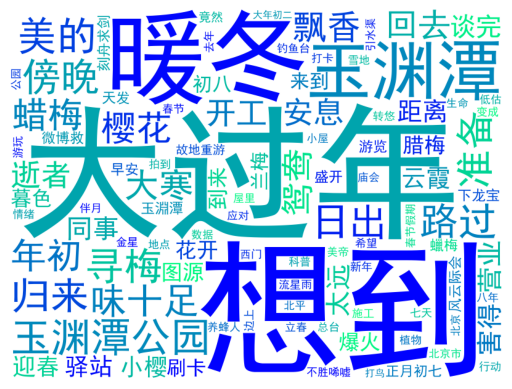

In [25]:
DrawWordCloudWithColor(word_fre,'weibo_玉渊潭')